In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import quad
import os

In [2]:
lmax = 2000
Tcmb  = 2.726e6    # CMB temperature in microkelvin?
rlmin, rlmax = 2, 2000 # CMB multipole range for reconstruction
nside = 2048
bstype = 'equi'
nsims = 448 # Number of simulations to average over (in sets of 3) 
ellmin = 2 
ellmax = 2000 ##### check!!!! vs sims
ls, cl_unl, cl_len, cl_phi = np.loadtxt('/home/amb257/kappa_bispec/make_sims_parallel/camb_lencl_phi.txt')
L_lots = np.arange(rlmax+1)
Lfac = (L_lots*(L_lots+1.) / 2 )**2
lcl = cl_len[0:rlmax+1] / Tcmb**2
print('lcl not interp', lcl[lmax])
ucl = cl_unl[0:rlmax+1] / Tcmb**2 #dimless unlensed T Cl
cl_kappa = Lfac * cl_phi[0:rlmax+1]
l_bins = np.arange(0,100,10)
cl_where = cl_kappa[l_bins]
print(cl_where)

lcl not interp 4.6554353095210565e-17
[0.00000000e+00 1.66870490e-07 2.06031272e-07 2.17543630e-07
 2.17004910e-07 2.10657754e-07 2.01537811e-07 1.91161657e-07
 1.80472047e-07 1.69897924e-07]


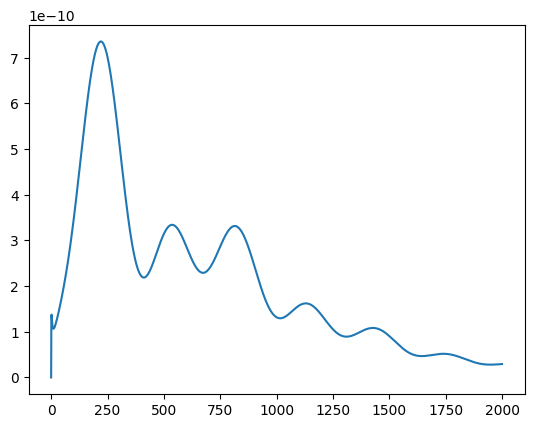

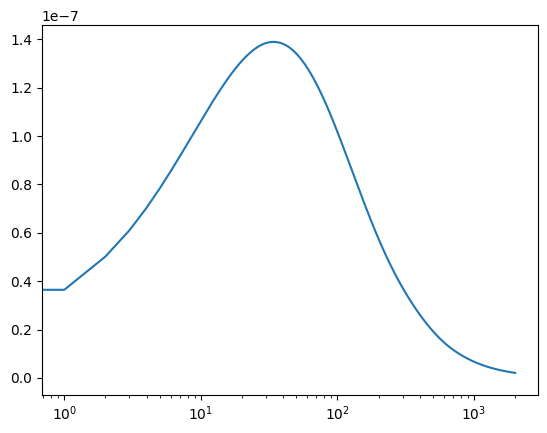

In [3]:
# Running some checks on the power spectra used

# Define the directory where power spec are stored
input_dir = "power_spec"

# Load the power spec
L = np.load(os.path.join(input_dir, "L.npy"))
cl_phi = np.load(os.path.join(input_dir, "cl_phi.npy"))
ucl = np.load(os.path.join(input_dir, "ucl.npy"))
ctot = np.load(os.path.join(input_dir, "ctot.npy"))

plt.plot(L, L*(L+1) / (2*np.pi) *ucl)
plt.show()
plt.plot(L, (L*(L+1))**2*cl_phi /  (2*np.pi))
plt.xscale('log')
plt.show()

[  2.  12.  22.  32.  42.  52.  62.  72.  82.  92. 102. 112. 122. 132.
 142. 152. 162. 172. 182. 192. 202. 212. 222. 232. 242. 252. 262. 272.
 282. 292. 302. 312. 322. 332. 342. 352. 362. 372. 382. 392. 402. 412.
 422. 432. 442. 452. 462. 472. 482. 492. 502. 512. 522. 532. 542. 552.
 562. 572. 582. 592. 602. 612. 622. 632. 642. 652. 662. 672. 682. 692.
 702. 712. 722. 732. 742. 752. 762. 772. 782. 792. 802. 812. 822. 832.
 842. 852. 862. 872. 882. 892. 902. 912. 922. 932. 942. 952. 962. 972.
 982. 992.]
[4.32940809e-16 1.07228881e-19 4.34287752e-21 5.19186566e-22
 1.02706258e-22 2.73249606e-23 8.86213622e-24 3.31481445e-24
 1.38253267e-24 6.28531079e-25 3.06718208e-25 1.58792806e-25
 8.64844481e-26 4.92181927e-26 2.91129347e-26 1.78171605e-26
 1.12395206e-26 7.28551484e-27 4.83969132e-27 3.28661320e-27
 2.27634238e-27 1.60458785e-27 1.14904276e-27 8.34486223e-28
 6.13632637e-28 4.56169943e-28 3.42341037e-28 2.59070813e-28
 1.97502996e-28 1.51543400e-28 1.16940088e-28 9.06936222e-29
 7.

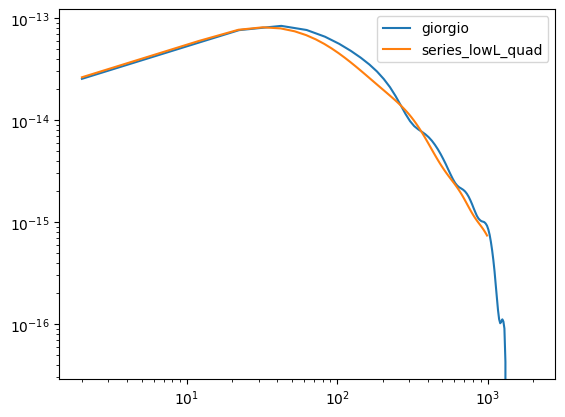

In [4]:
LensingL, testquad = np.loadtxt('No_l_factors_mathematica_TEST_quad_equi.txt')
print(LensingL)
print(testquad)
#LensingL, testdirect = np.loadtxt('TEST_direct_equi.txt')
_, minusincorrect_testquad = np.loadtxt('minusincorrect_TEST_quad_equi.txt')
_, minusincorrect_testdirect = np.loadtxt('minusincorrect_TEST_direct_equi.txt')
# import giorgio results
L_analytic, N2_6pt = np.loadtxt("/home/amb257/kappa_bispec/optimal_est/Plots/data/data_for_paper/numerical_N2/Giorgio_equi_N2_analytic.txt")
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.loglog(LensingL, ((LensingL+1) / LensingL)**2 *1/8*(LensingL*(LensingL+1))**3 * testquad, label='series_lowL_quad')
#plt.loglog(LensingL, -1*testdirect, ls = '--', label='series_lowL_directsum')
#plt.loglog(LensingL, minusincorrect_testquad, label='minusincorrect_series_lowL_quad')
#plt.xlim(1,200)
plt.legend()

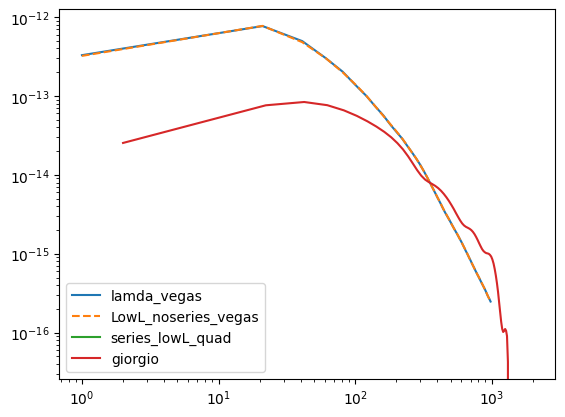

In [5]:
input_dir = "vegas_results"
L = np.load(os.path.join(input_dir, "L.npy"))
lambda_L = np.load(os.path.join(input_dir, "lambda_L.npy"))
lamda_vegas_lowL = np.load(os.path.join(input_dir, "lambda_VEGAS_lowL.npy"))

Lfac_kappa = (0.5*L*(L+1))**3 
lambda_Lfac = (0.5*lambda_L*(lambda_L+1))**3 
vegas_lowL = np.load(os.path.join(input_dir, "VEGAS_lowL.npy"))
nonoise_vegas_lowL = np.load(os.path.join(input_dir, "nonoise_VEGAS_lowL.npy"))

#plt.loglog(L, Lfac_kappa*nonoise_vegas_lowL, label = 'nonoise_LowL_noseries_vegas')
plt.loglog(lambda_L, lambda_Lfac*lamda_vegas_lowL,label = 'lamda_vegas')
plt.loglog(L, Lfac_kappa*vegas_lowL, ls = '--',label = 'LowL_noseries_vegas')
plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')

#plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.legend()

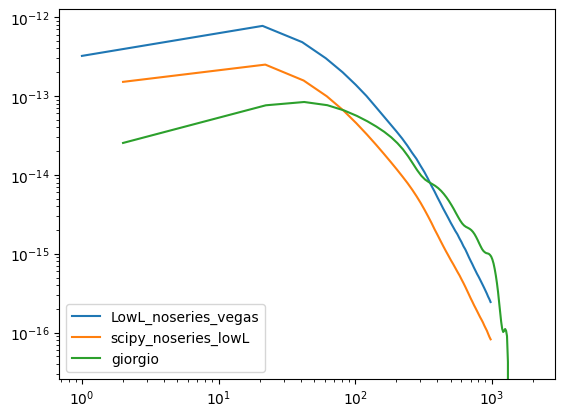

In [6]:
input_dir = "scipy_results"
L_scipy = np.load(os.path.join(input_dir, "L.npy"))

Lfac_kappa_scipy = (0.5*L_scipy*(L_scipy+1))**3 
scipy_lowL = np.load(os.path.join(input_dir, "scipy_lowL_noseries.npy"))
plt.loglog(L, Lfac_kappa*vegas_lowL, label = 'LowL_noseries_vegas')

#plt.loglog(L, Lfac_kappa*nonoise_vegas_lowL, label = 'nonoise_LowL_noseries_vegas')
plt.loglog(L_scipy, Lfac_kappa_scipy*scipy_lowL, label = 'scipy_noseries_lowL')

#plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.legend()

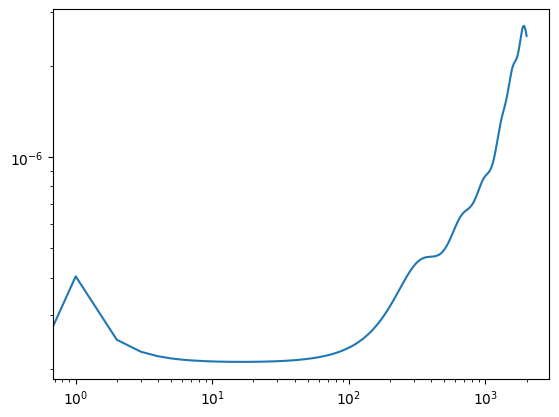

In [7]:
L_norm, norm_phi = np.loadtxt('norm_phi.txt')
Lfac_norm = (0.5*L_norm*(L_norm+1.))**2
plt.loglog(L_norm, Lfac_norm*norm_phi)
#This looks legit.

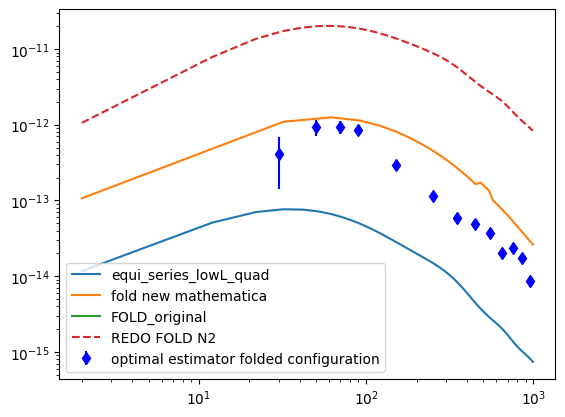

In [13]:
""" Now test folded series expansion N2 """

### Notes - shape driven almost totally by setting A1,2,3. Setting A(L/2) twice and A(L) then leaving Clphis as C(L) gives pretty much bang on. Why wouldn't the clphi"s L change though?
### Changing to any Clphi(L/2) makes it too large (even just one of the two)

L_redo, N2_redo = np.loadtxt('n2_bias_results.txt')
LensingL_fold, N2_fold = np.loadtxt('N2_fold.txt')
LensingL_fold, direct_fold = np.loadtxt('direct_fold.txt')
L_samenorm, fold_samenorm = np.loadtxt('same_norm_quad_fold.txt')
L_newmathematica, fold_N2_newmathematica = np.loadtxt('new_mathematica_N2_fold.txt')
Lfac = LensingL_fold*(LensingL_fold+1)  * (LensingL_fold/2*(LensingL_fold/2+1))**2
Lfac_mathematica = L_newmathematica*(L_newmathematica+1)  * (L_newmathematica/2*(L_newmathematica/2+1))**2


L_As_same, fold_As_same = np.loadtxt('allAs_same_norm_quad_fold.txt')
L_opt_fold, opt_est_fold, err_fold = np.loadtxt('folded_opt_est.txt')
plt.loglog(LensingL, 1/8*(LensingL*(LensingL+1))**3 * testquad, label='equi_series_lowL_quad')
plt.loglog(L_newmathematica, 1/8*Lfac_mathematica * fold_N2_newmathematica, label='fold new mathematica')
plt.errorbar(L_opt_fold, -1*opt_est_fold, yerr = err_fold, fmt='bd', label = 'optimal estimator folded configuration')
#plt.loglog(LensingL_fold, -1/8*Lfac*N2_fold, label='FOLD_original')
plt.loglog(LensingL_fold, -1/8*(LensingL_fold*(LensingL_fold+1))**3*direct_fold, label='FOLD_original')

plt.loglog(L_redo, -1/8*(L_redo*(L_redo+1))**3*N2_redo,  ls = '--', label='REDO FOLD N2')

plt.legend()

[-6.47861931e-16 -1.15515591e-19 -4.51500341e-21 -5.32447337e-22
 -1.04574135e-22 -2.76989746e-23 -8.95665725e-24 -3.34301170e-24
 -1.39206301e-24 -6.32079829e-25 -3.08145478e-25 -1.59402963e-25
 -8.67580564e-26 -4.93452590e-26 -2.91732259e-26 -1.78458913e-26
 -1.12529231e-26 -7.29134458e-27 -4.84176251e-27 -3.28684352e-27
 -2.27571081e-27 -1.60359750e-27 -1.14795056e-27 -8.33419992e-28
 -6.12651983e-28 -4.55298531e-28 -3.41583748e-28 -2.58422883e-28
 -1.96955094e-28 -1.51084404e-28 -1.16558574e-28 -9.03786321e-29
 -7.04072117e-29 -5.50912583e-29 -4.32894379e-29 -3.41554510e-29
 -2.70581934e-29 -2.15248436e-29 -1.71964459e-29 -1.37990944e-29
 -1.11230869e-29 -9.00771530e-30 -7.32973801e-30 -5.99387120e-30
 -4.92623575e-30 -4.06945601e-30 -3.37891761e-30 -2.81987950e-30
 -2.36519121e-30 -1.99358255e-30 -1.68835199e-30 -1.43636890e-30
 -1.22730588e-30 -1.05297606e-30 -9.06866498e-31 -7.83781722e-31
 -6.79567686e-31 -5.90898005e-31 -5.15095542e-31 -4.50000042e-31
 -3.93862887e-31 -3.45266

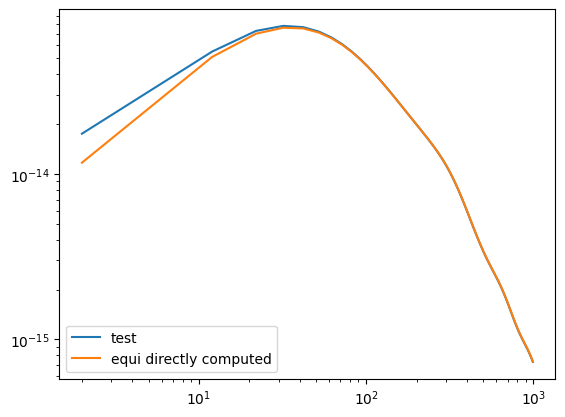

In [9]:
# Here we test the full integral which will be used for understanding binning effects and compute it for the equilateral configuration and compare to existing calculation

L_test, N2_equi_full_test = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/full_int_equi_test.txt')
print(N2_equi_full_test)
print(testquad)
plt.loglog(L_test, -1/8*(L_test*(L_test+1))**3 * N2_equi_full_test, label = 'test')
plt.loglog(LensingL, 1/8*(LensingL*(LensingL+1))**3 * testquad, label='equi directly computed')
plt.legend()


[1.39690004e-13 2.23452274e-17 1.00349760e-18 1.32557452e-19
 2.86915181e-20 8.28199619e-21 2.89263797e-21 1.15767088e-21
 5.13692173e-22 2.47125135e-22 1.26969172e-22 6.89000708e-23
 3.91565382e-23 2.31527013e-23 1.41755189e-23 8.94882038e-24
 5.80338781e-24 3.85568097e-24 2.61824085e-24 1.81329217e-24
 1.27823057e-24 9.15532953e-25 6.65283766e-25 4.89793149e-25
 3.64852880e-25 2.74660682e-25 2.08728153e-25 1.59979935e-25
 1.23559458e-25 9.60916338e-26 7.51996142e-26 5.91889854e-26
 4.68377639e-26 3.72528161e-26 2.97744726e-26 2.39107250e-26
 1.92916598e-26 1.56371346e-26 1.27334735e-26 1.04167446e-26
 8.56061534e-27 7.06737615e-27 5.86127105e-27 4.88314934e-27
 4.08664981e-27 3.43532617e-27 2.90045286e-27 2.45932090e-27
 2.09391694e-27 1.78991080e-27 1.53586722e-27 1.32264619e-27
 1.14293779e-27 9.90843185e-28 8.61586889e-28 7.51289097e-28
 6.56788902e-28 5.75505788e-28 5.05325240e-28 4.44511518e-28
 3.91634290e-28 3.45515453e-28 3.05184892e-28 2.69835303e-28
 2.38791648e-28 2.114869

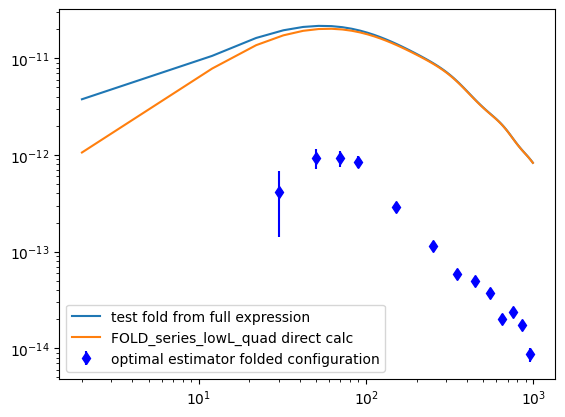

In [10]:
# test full expression for folded

L_test_fold, N2_fold_full_test = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/full_int_fold_test.txt')
print(N2_fold_full_test)
plt.loglog(L_test_fold, 1/8*(L_test_fold*(L_test_fold+1))**3 * N2_fold_full_test, label = 'test fold from full expression')
plt.errorbar(L_opt_fold, -1*opt_est_fold, yerr = err_fold, fmt='bd', label = 'optimal estimator folded configuration')
plt.loglog(LensingL_fold, -1/8*(LensingL_fold*(LensingL_fold+1))**3*N2_fold, label='FOLD_series_lowL_quad direct calc')

plt.legend()


[ 3.28009719e-22 -4.07317174e-23 -4.77692393e-24 -8.52913540e-25]


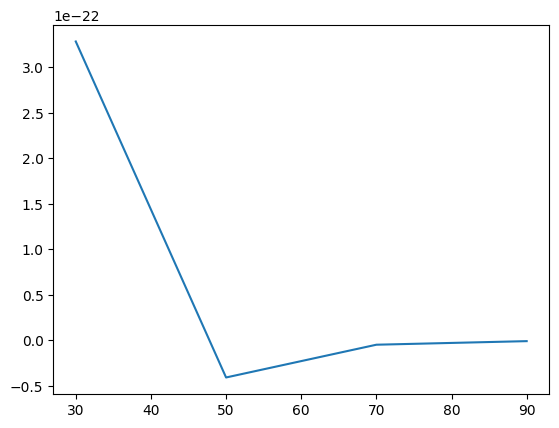

In [ ]:
bin_mid, binning_test = np.load('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/binned_calc.npy')
print(binning_test)
plt.plot(bin_mid, binning_test)

In [12]:
# Load in the integrand used for the direct sum calculation
ell, integrand = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/integrand_direct_sum_10.0.txt')
plt.plot(ell, integrand)
print(np.sum(integrand))
integral = np.trapz(integrand, ell)
print(integral)
plt.xlim(500,800)

OSError: /home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/integrand_direct_sum_10.0.txt not found.

In [ ]:
L, direct_int = np.loadtxt('new_direct_sum_integeral.txt')
#L, direct_int = np.loadtxt('integral_direct_sum_10.0.txt')
plt.plot(L, direct_int)
plt.xlabel('L')
print(direct_int)

: 

In [ ]:
plt.loglog(L_lots, cl_kappa**2)
plt.xlim(20,1000)

: 

: 

In [ ]:
L, ctotprime = np.loadtxt('ctotprime.txt')
L, lclprime = np.loadtxt('lclprime.txt')
L, lcldoubleprime = np.loadtxt('lcldoubleprime.txt')
L, lcl = np.loadtxt('lcl.txt')
L, ocl = np.loadtxt('ocl.txt')
plt.plot(L, L* lclprime / lcl, label='lclprime')
plt.plot(L, L* ctotprime / lcl, label = 'ctotprime')
plt.xscale('log')
plt.legend()

: 

In [ ]:
plt.plot(L, L* ctotprime / lcl - L* lclprime / lcl)

: 

In [ ]:
plt.loglog(L, lcl, label = 'lcl')
plt.loglog(L, ocl-lcl, label = 'ocl-lcl')
plt.legend()

: 

In [ ]:
print(lcl[0:2])
print(ocl[0:2])

: 

In [ ]:
plt.plot(L, L**2 / lcl * lcldoubleprime)

: 

In [ ]:
import numpy as np
from numpy import random 
from scipy.integrate import quad
# Define a random integrand
def integrand_fn(ell):
    integrand = 1e-11*np.cos(ell / 100) * np.sin(ell / 300) + random.rand()*1e-12
    return integrand

# Set integration limits
ellmin = 2
ellmax = 100

integrand_values = []
for ell in np.arange(ellmin, ellmax + 1):
    integrand = integrand_fn(ell)
    integrand_values.append(integrand)

# Now write some code to integrate this using quad
integral_quad, error = quad(integrand_fn, ellmin, ellmax, limit=1000)

# Now compute the same integrand using direct summation
integral_direct_sum = np.sum(integrand_values)

print('quad', integral_quad)
print('direct sum', integral_direct_sum)

: 

In [ ]:
ell = np.arange(ellmin, ellmax + 1)
plt.plot(ell, integrand_values)


: 

: 